# Numerical Precision and Approximations
7th May 2018
## Part1
Comperation of "float32" and "float64" arrays

In [1]:
import numpy as np
import scipy
from scipy import misc

In [5]:
# Define a single-pricision float point arry. Unlike MATLAB the (55) means (1x55) rather than (55x55) 
sp = np.ones((55),"float32")
# Define a double-pricision float point arry
dp = np.ones((55),"float64")

x = 1
for i in np.arange(np.size(sp)):
    x = x/2;
    sp[i] = sp[i]+x # Adding 1/(2^i) in the i-th loop
    dp[i] = dp[i]+x

In [11]:
# Comparing the results
for i in np.arange(sp.size):
    print(sp[i]-1,dp[i]-1)

# Try using "ljust()", "rjust()" or "center()"

0.5 0.5
0.25 0.25
0.125 0.125
0.0625 0.0625
0.03125 0.03125
0.015625 0.015625
0.0078125 0.0078125
0.00390625 0.00390625
0.001953125 0.001953125
0.0009765625 0.0009765625
0.00048828125 0.00048828125
0.000244140625 0.000244140625
0.0001220703125 0.0001220703125
6.103515625e-05 6.103515625e-05
3.0517578125e-05 3.0517578125e-05
1.52587890625e-05 1.52587890625e-05
7.62939453125e-06 7.62939453125e-06
3.814697265625e-06 3.814697265625e-06
1.9073486328125e-06 1.9073486328125e-06
9.5367431640625e-07 9.5367431640625e-07
4.76837158203125e-07 4.76837158203125e-07
2.384185791015625e-07 2.384185791015625e-07
1.1920928955078125e-07 1.1920928955078125e-07
0.0 5.960464477539063e-08
0.0 2.9802322387695312e-08
0.0 1.4901161193847656e-08
0.0 7.450580596923828e-09
0.0 3.725290298461914e-09
0.0 1.862645149230957e-09
0.0 9.313225746154785e-10
0.0 4.656612873077393e-10
0.0 2.3283064365386963e-10
0.0 1.1641532182693481e-10
0.0 5.820766091346741e-11
0.0 2.9103830456733704e-11
0.0 1.4551915228366852e-11
0.0 7.27

## Part 2
Approximation of Transcendental Function $e^x$ by taylor series

In [12]:
# Evaluate numerically exp(x) by taylor expansion
def TaylorExp(x,n=10):
    x_n = x*np.ones(n)
    i_n = np.arange(n)
    x_Power = np.power(x_n, i_n)
    i_Factorial = misc.factorial(i_n) # misc.factorial() works with arrays unlike math.factorial()
    return np.sum(x_Power / i_Factorial)

In [16]:
import matplotlib.pyplot as mpl

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  


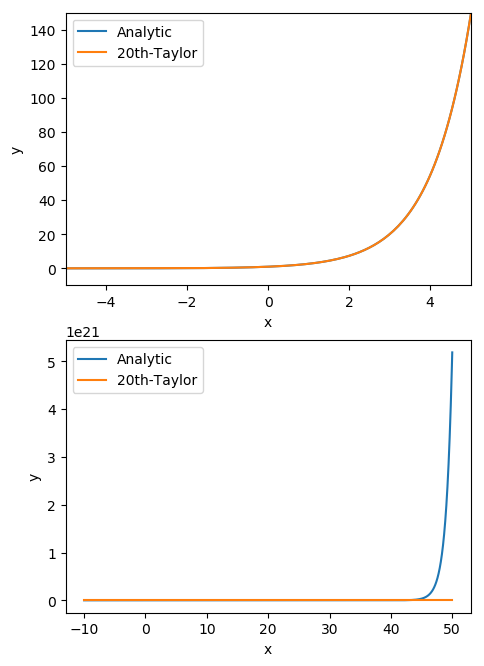

In [57]:
# Compare the results
x = np.linspace(-10,50,1000)
y = np.exp(x)
y_T = np.zeros_like(y)

for i in np.arange(x.size):
    y_T[i] = TaylorExp(x[i],20)

fig1 = mpl.figure(dpi=100)
ax1 = mpl.subplot(2,1,1)
mpl.plot(x,y,label='Analytic')
mpl.plot(x,y_T,label='20th-Taylor')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.legend()
ax1.set_xlim(-5,5)
ax1.set_ylim(-10,150)

ax2 = mpl.subplot(2,1,2)
mpl.plot(x,y,label='Analytic')
mpl.plot(x,y_T,label='20th-Taylor')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.legend()

mpl.subplots_adjust(bottom=0.1,right=0.8,top=1.6,hspace=0.2)
mpl.show()

In [76]:
# Try to show only integer number in x axis
from matplotlib.ticker import MaxNLocator

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  


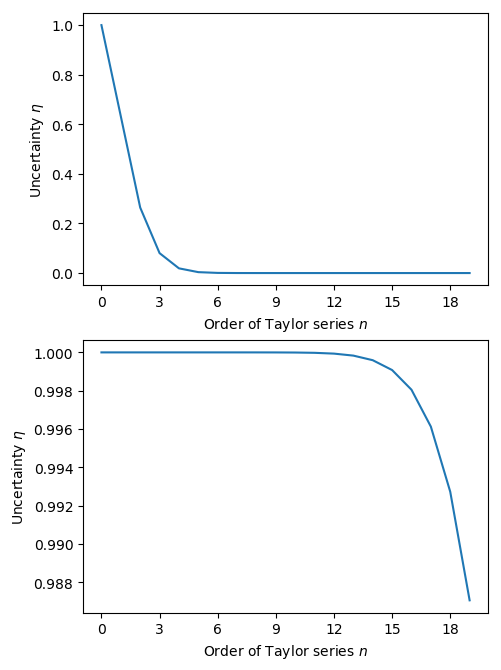

In [81]:
# With respect to different orders

x = 1
N = 20 # Highest order

eta = np.zeros(N)
for i in np.arange(N):
    eta[i] = (np.exp(x)-TaylorExp(x,i))/np.exp(x)

fig2 = mpl.figure(dpi=100)
ax3 = mpl.subplot(2,1,1)
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
mpl.plot(np.arange(N),eta)
mpl.xlabel('Order of Taylor series $n$')
mpl.ylabel('Uncertainty $\eta$')


x = 30
N = 20 # Highest order

eta = np.zeros(N)
for i in np.arange(N):
    eta[i] = (np.exp(x)-TaylorExp(x,i))/np.exp(x)

ax4 = mpl.subplot(2,1,2)
ax4.xaxis.set_major_locator(MaxNLocator(integer=True))
mpl.plot(np.arange(N),eta)
mpl.xlabel('Order of Taylor series $n$')
mpl.ylabel('Uncertainty $\eta$')

mpl.subplots_adjust(bottom=0.1,right=0.8,top=1.6,hspace=0.2)
mpl.show()